In [1]:
#number_of_streamlines.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot evolution of self-confining ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, monitor = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'confine_inner_edge = ', confine_inner_edge
print 'confine_outer_edge = ', confine_outer_edge
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()
print 'execution time (min) = ', (monitor['current_time'] - monitor['start_time'])/60.0
print 'monitor = ', monitor

r.shape =  (1001, 2, 241)
total_ring_mass =  5e-11
shear_viscosity =  2e-13
bulk_viscosity =  2e-13
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.005, 'e_prime': 0.0}
confine_inner_edge =  False
confine_outer_edge =  False
e.min() =  0.004744382220217247
e.max() =  0.0052199887230846235
execution time (min) =  26.6666666667
monitor =  {'current_time': 1704078268, 'streamline_crossing_timestep': None, 'start_time': 1704076668, 'modified_params': None, 'nan_timestep': None, 'current_timestep': 500000, 'self_interacting': True}


In [3]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*np.abs(shear_viscosity))
print 'viscous_timescale = ', viscous_timescale
print 'viscous_timescale (orbits) = ', viscous_timescale/(2*np.pi)
times_viscous = times/viscous_timescale
print 'times_viscous.max() = ', times_viscous.max()
print ('number of orbits evolves (10^5) = ', times.max()/(2*np.pi)/1.0e5)

viscous_timescale =  9374.999999999998
viscous_timescale (orbits) =  1492.0775914865185
times_viscous.max() =  26.66666666666667
('number of orbits evolves (10^5) = ', 0.3978873577297384)


In [4]:
#ring stats in physical units
G_cgs = 6.67e-8
M_planet_gm = 5.68e29
r0_cm = 1.0e10
total_ring_mass_gm = total_ring_mass*M_planet_gm
print 'total_ring_mass_gm = ', total_ring_mass_gm
satellite_density_cgs = 1.0                       #density if ringlet was instead a satellite
satellite_radius_cm = (3*total_ring_mass_gm/(4*np.pi*satellite_density_cgs))**(1.0/3.0)
print 'satellite_radius_cm = ', satellite_radius_cm
print 'satellite_radius    (km) = ', satellite_radius_cm/1.0e5
radial_width_cm = radial_width*r0_cm
print 'radial_width_cm = ', radial_width_cm
print 'ringlet radial_width    (km) = ', radial_width_cm/1.0e5
orbit_period_sec = 2*np.pi*np.sqrt(r0_cm*r0_cm*r0_cm/(G_cgs*M_planet_gm))
print 'orbit_period_sec = ', orbit_period_sec
print 'orbit_period    (hours) = ', orbit_period_sec/3600
viscous_timescale_sec = (viscous_timescale/(2*np.pi))*orbit_period_sec
print 'viscous_timescale_sec = ', viscous_timescale_sec
print 'viscous_timescale    (years) = ', viscous_timescale_sec/(60*60*24*365.25)
shear_viscosity_cgs = radial_width_cm*radial_width_cm/(12*viscous_timescale_sec)
print 'shear_viscosity_cgs = ', shear_viscosity_cgs
surface_density_cgs = total_ring_mass_gm/(2*np.pi*r0_cm*radial_width_cm)
print 'surface_density_cgs = ', surface_density_cgs

total_ring_mass_gm =  2.84e+19
satellite_radius_cm =  1892677.31529
satellite_radius    (km) =  18.9267731529
radial_width_cm =  1500000.0
ringlet radial_width    (km) =  15.0
orbit_period_sec =  32280.688093248707
orbit_period    (hours) =  8.966857803680197
viscous_timescale_sec =  48165291.34170207
viscous_timescale    (years) =  1.5262659816241433
shear_viscosity_cgs =  3892.8447181977344
surface_density_cgs =  301.333358921


In [5]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [6]:
#calculate differences da, de, dwt between outer & inner streamline's periapse
from libration import *
a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
    orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)

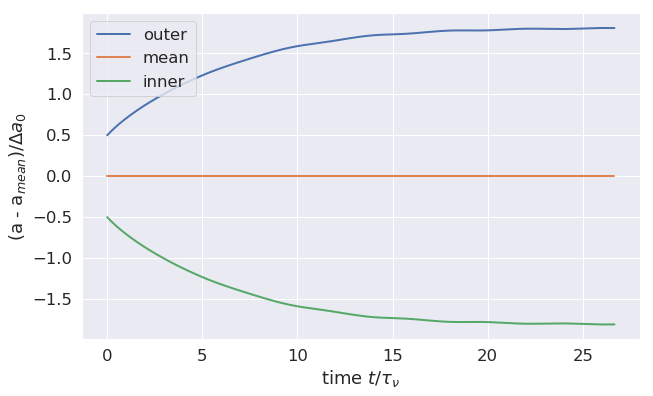

In [7]:
#plot streamline's mutual a-evolution
da_init = da[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = (a_outer - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='outer')
y = (a_mean - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='mean')
y = (a_inner - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='inner')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('(a - a$_{mean})/\Delta a_0$')
p = ax.legend()

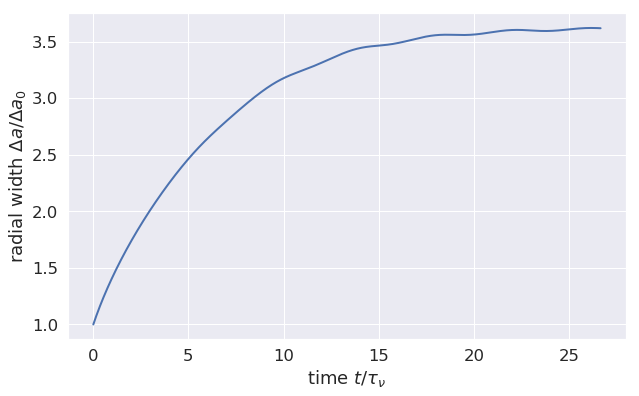

In [8]:
#plot delta_a versus time
x = times_viscous
y = da/da_init
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')

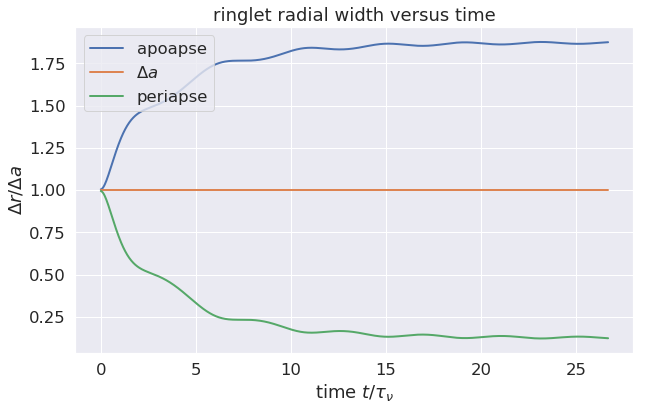

In [9]:
#plot streamline's dr_peri and dr_apo vs time
q_inner = a_inner*(1.0 - e_inner)
q_outer = a_outer*(1.0 - e_outer)
Q_inner = a_inner*(1.0 + e_inner)
Q_outer = a_outer*(1.0 + e_outer)
dr_peri = q_outer - q_inner
dr_apo = Q_outer - Q_inner
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = dr_apo/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label='apoapse')
y = da/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta a$')
y = dr_peri/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label='periapse')
p = ax.set_title('ringlet radial width versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta r/\Delta a$')
p = ax.legend()

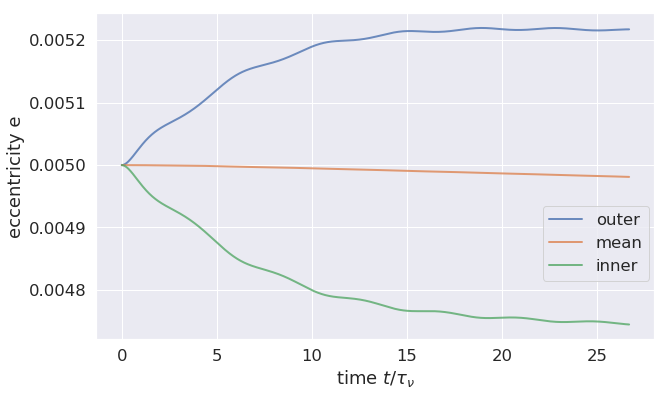

In [10]:
#plot streamline's e-evolution
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_mean
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='mean')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend(loc=(0.8, 0.18))

1.0000750189859602 0.00499944902464307 1.0017602360422937 2e-13 31243895.529735092


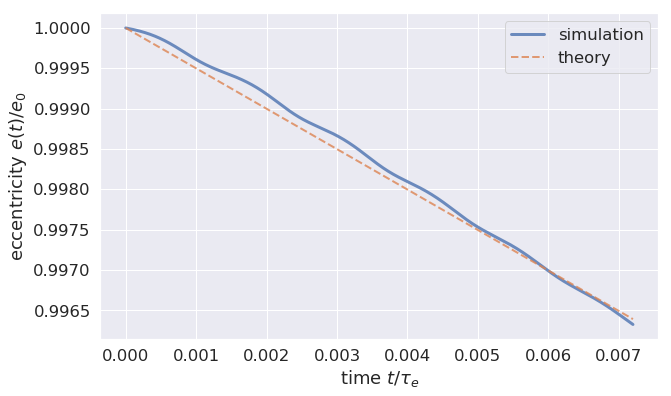

In [11]:
#plot streamline's e-damping
idx = 100
a_sub = a_mean[idx:]
e_sub = e_mean[idx:]
times_sub = times[idx:]
a0 = a_sub[0]
e0 = e_sub[0]
w0 = Omega(J2, Rp, a0)
I_ep = 0.889
tau_e = 2*a0*a0*e0*e0/(9*I_ep*shear_viscosity)
print a0, e0, w0, shear_viscosity, tau_e
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = (times_sub - times_sub[0])/tau_e
y = e_sub/e0
p = ax.plot(x, y, linestyle='-', linewidth=3, alpha=0.8, label='simulation')
y = np.sqrt(1 - x)
p = ax.plot(x, y, linestyle='dashed', linewidth=2, alpha=0.8, label='theory')
p = ax.set_ylabel(r'eccentricity $e(t)/e_0$')
p = ax.set_xlabel(r'time $t/\tau_e$')
p = ax.legend()

In [12]:
#compute system total angular momentum
r_bc, t_bc, vr_bc, vt_bc, r_0, t_0, vr_0, vt_0 = planeto2bary_all_times(times, r, t, vr, vt, total_ring_mass)
planet_angular_momentum, inner_ring_angular_momentum, outer_ring_angular_momentum, total_angular_momentum = \
    system_angular_momentum(times, r_bc, t_bc, vr_bc, vt_bc, r_0, t_0, vr_0, vt_0, \
        total_ring_mass, number_of_streamlines, particles_per_streamline)
delta_angular_momentum = total_angular_momentum - total_angular_momentum[0]
fractional_angular_momentum_change = np.abs(delta_angular_momentum/total_angular_momentum[0])
print ('planet_angular_momentum[0] = ', planet_angular_momentum[0])
print ('total_angular_momentum[0] = ', total_angular_momentum[0])
print 'max fractional angular momentum change = ', fractional_angular_momentum_change.max()

('planet_angular_momentum[0] = ', 5.299394760034168e-28)
('total_angular_momentum[0] = ', 5.009552668172478e-11)
max fractional angular momentum change =  5.944988673664595e-08


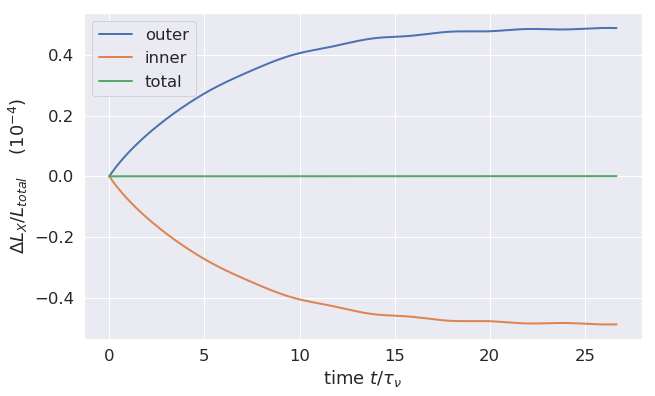

In [13]:
#plot delta_X_angular_momentum over time, for X=inner/outer streamline
factor = (1.0e-4)*total_angular_momentum[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = (outer_ring_angular_momentum - outer_ring_angular_momentum[0])/factor
p = ax.plot(x, y, linestyle='-', linewidth=2, label='outer')
y = (inner_ring_angular_momentum - inner_ring_angular_momentum[0])/factor
p = ax.plot(x, y, linestyle='-', linewidth=2, label='inner')
y = (total_angular_momentum - total_angular_momentum[0])/factor
p = ax.plot(x, y, linestyle='-', linewidth=2, label='total')
p = ax.set_ylabel(r'$\Delta L_X/L_{total}$    $(10^{-4})$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()

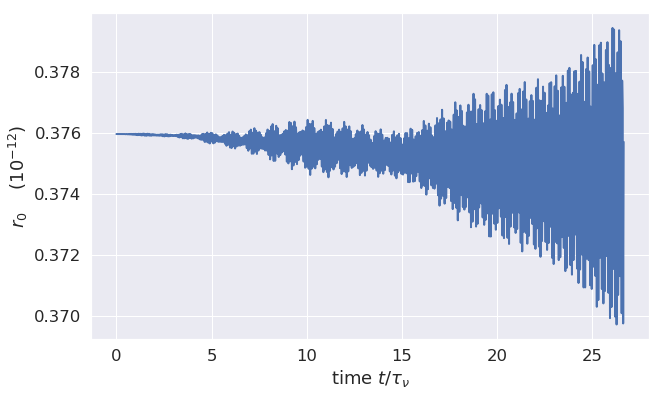

In [14]:
#central planet's distance from barycenter
factor = 1.0e-12
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = r_0/factor
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_ylabel(r'$r_0$    $(10^{-12})$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')

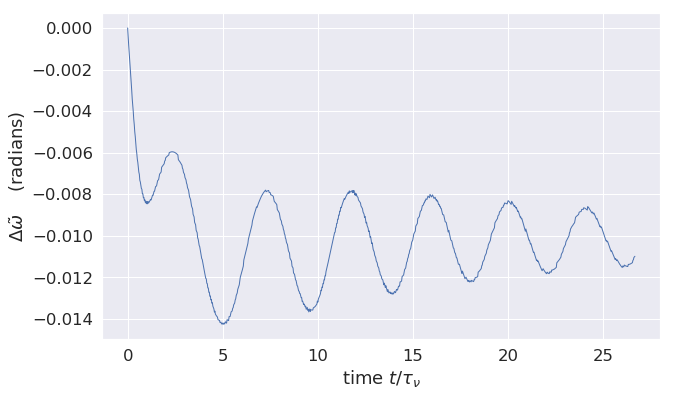

In [15]:
#plot dwt versus time
x = times_viscous
y = dwt
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')

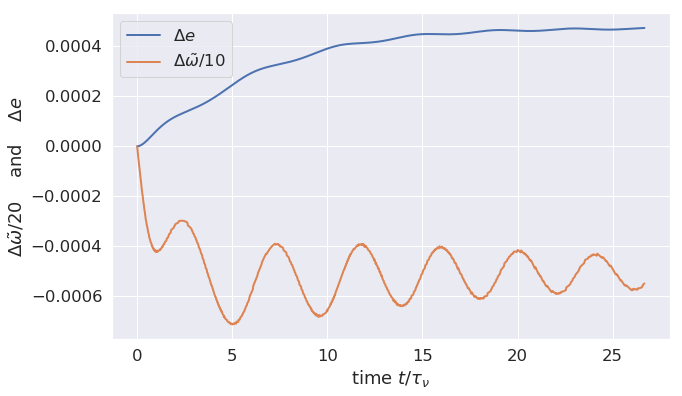

In [16]:
#plot de and dwt aversus time
x = times_viscous
y = de
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e$')
y = dwt/20
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta\tilde{\omega}/10$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}/20$    and    $\Delta e$')
p = ax.legend()

In [17]:
#compute e_prime, wt_prime, q to lowest order, and H(q)
H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
H_avg = H.mean()

dynamical_timescale =  38250.0
timesteps_per_output_factor =  1.53


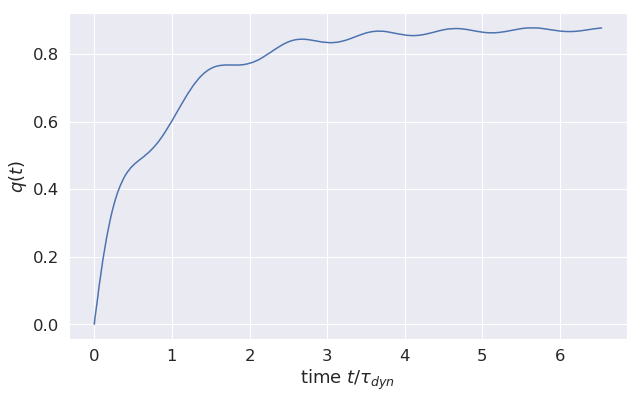

In [18]:
#dynamical timescale=time when ringlet achieves q=0.6, this ringlet is to be evolved until t=20*t_dyn
idx = (q > 0.6)
dynamical_timescale = times[idx][0]
print 'dynamical_timescale = ', dynamical_timescale
timesteps_per_output_factor = 10*dynamical_timescale/times.max()
print 'timesteps_per_output_factor = ', timesteps_per_output_factor
x = times/dynamical_timescale
y = q
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-')
p = ax.set_xlabel(r'time $t/\tau_{dyn}$')
p = ax.set_ylabel(r'$q(t)$')

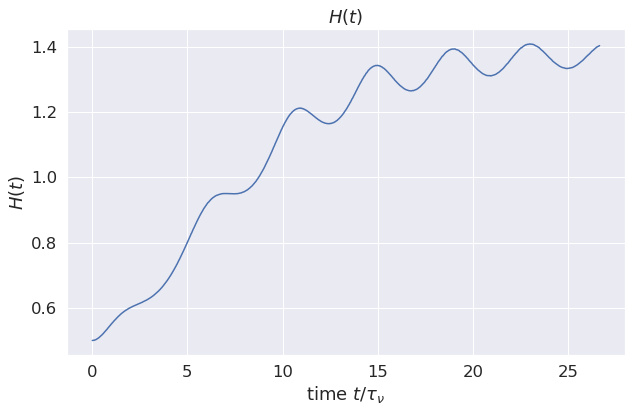

In [19]:
#plot H(q) versus time
x = times_viscous
y = H
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-')
p = ax.set_title(r'$H(t)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$H(t)$')

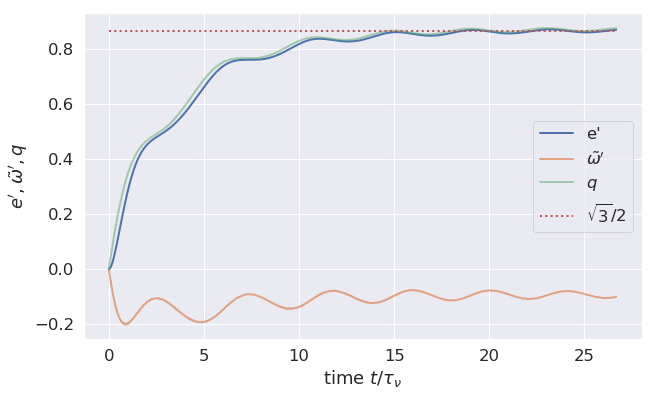

In [20]:
#plot e_prime wt_prime and q versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.7, label=r"$\tilde{\omega}'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$q$', alpha=0.5)
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$e', \tilde{\omega}', q$")
p = ax.legend()

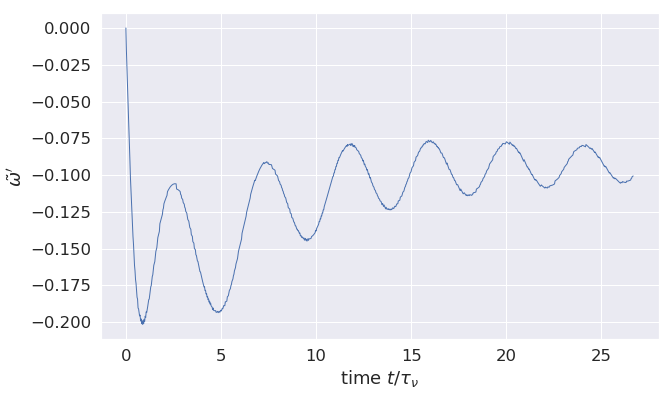

In [21]:
#plot wt_prime versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$\tilde{\omega}'$")

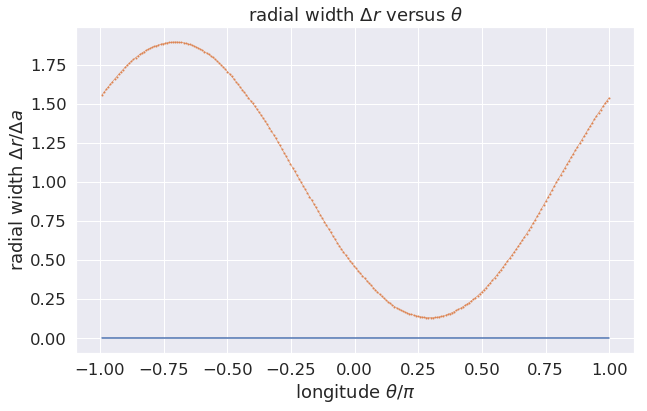

In [22]:
#inspect final radial width versus longitude
tidx = len(times) - 1
rt = r[tidx]
r0 = rt[0]
r1 = rt[1] - r0
r0 = r0 - r0
at = a[tidx]
a0 = at[0]
a1 = at[1]
delta_a = a1.mean() - a0.mean()
tt = t[tidx]
t0 = tt[0]
t1 = tt[1]
f, ax = plt.subplots(figsize=(10, 6))
x = t0/np.pi
y = r0/delta_a
p = ax.plot(x, y, linestyle='-')
x = t1/np.pi
y = r1/delta_a
p = ax.plot(x, y, linestyle='-', linewidth=0.5, marker='.', markersize=2)
p = ax.set_title(r'radial width $\Delta r$ versus $\theta$')
p = ax.set_xlabel(r'longitude $\theta/\pi$')
p = ax.set_ylabel(r'radial width $\Delta r/\Delta a$')

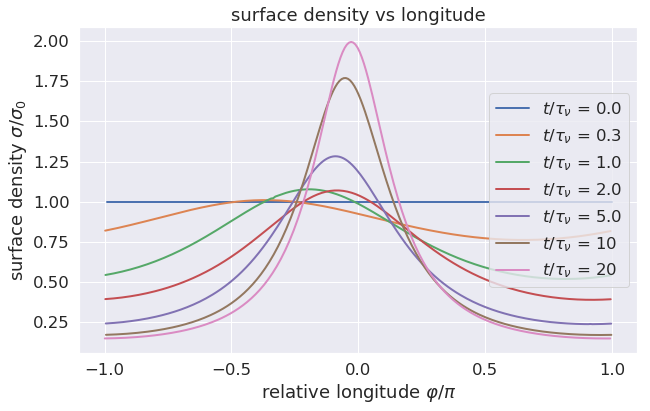

In [23]:
#plot surface density vs longitude
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
plot_times = [0.0, 0.3, 1.0, 2.0, 4.99, 10.0, 20.0]#, 30.0, 60.0]
middle_index = number_of_streamlines/2
for plot_time in plot_times:
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    r_now = r[t_idx]
    t_now = t[t_idx]
    vr_now = vr[t_idx]
    vt_now = vt[t_idx]
    wt_now = wt[t_idx]
    lambda_ = get_lambda(total_ring_mass, number_of_streamlines, J2, Rp, r_now, t_now, vr_now, vt_now)
    delta_r = delta_f(r_now, t_now)
    sd_now = surface_density(lambda_, delta_r)
    r_middle = r_now[middle_index]
    t_middle = t_now[middle_index]
    wt_middle = wt_now[middle_index]
    sd_middle = sd_now[middle_index]
    pidx = r_middle.argmin()
    wt_min = wt_middle[pidx]
    t_rotating = adjust_angle(t_middle - wt_min)
    if (t_idx == 0):
        sd_initial = sd_now.mean()
    y = sd_middle/sd_initial
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    times_visc = times_viscous[t_idx]
    if (times_visc > 1 ):
        times_visc = round(times_visc, 0)
    lbl = r'$t/\tau_\nu$ = ' + str(times_visc)[0:3]
    if (lbl[-1] == '.'):
        lbl = lbl[:-1]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'surface density vs longitude')
p = ax.set_xlabel(r'relative longitude $\varphi/\pi$')
p = ax.set_ylabel(r'surface density $\sigma/\sigma_0$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = plt.legend(loc='center right')

relative_longitude =  0.008483144099177609 idx =  124
[0.         3.54180795 3.5509372  0.        ]
relative_longitude =  -3.1320878119974673 idx =  4
[0.         0.26268097 0.26258061 0.        ]
relative_longitude =  -1.5974524014659957 idx =  63
[0.         0.55139997 0.5483664  0.        ]
relative_longitude =  1.6404500396793427 idx =  186
[0.         0.43084178 0.43206519 0.        ]


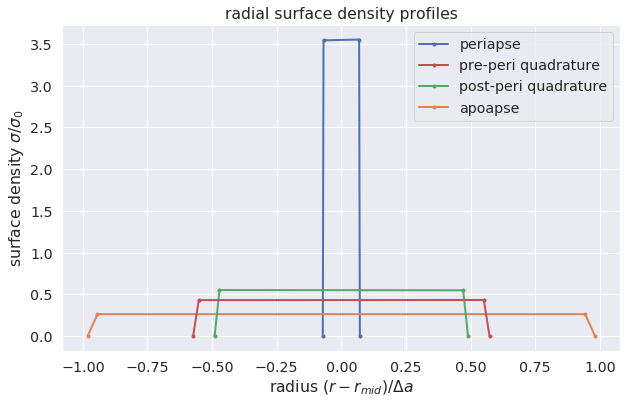

In [24]:
#plot radial cuts of surface density...surface density contrast = 3.58/0.45 = 7.96
sns.set(font_scale=1.3, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
t_idx = total_number_of_outputs - 1
r_now = r[t_idx]
t_now = t[t_idx]
vr_now = vr[t_idx]
vt_now = vt[t_idx]
wt_now = wt[t_idx]
lambda_ = get_lambda(total_ring_mass, number_of_streamlines, J2, Rp, r_now, t_now, vr_now, vt_now)
delta_r = delta_f(r_now, t_now)
sd_now = surface_density(lambda_, delta_r)
sd_mean = sd_now.mean()
r_middle = r_now[middle_index]
#sd(r) along periapse
idx = r_middle.argmin() + 1
idx_peri = idx
relative_longitude = (t_now - wt_now)[0][idx]
print 'relative_longitude = ', relative_longitude, 'idx = ', idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.02*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.02*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded) - r_profile.mean()
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/da[t_idx]
yp = sd_padded/sd_mean
p = ax.plot(xp, yp, linestyle='-', linewidth=2, marker='o', markersize=3, label='periapse')
print (yp)
#sd(r) along apoapse
idx = r_middle.argmax() + 1
relative_longitude = (t_now - wt_now)[0][idx]
print 'relative_longitude = ', relative_longitude, 'idx = ', idx
idx_apo = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.02*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.02*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded) - r_profile.mean()
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/da[t_idx]
yp = sd_padded/sd_mean
p = ax.plot(xp, yp, linestyle='-', linewidth=2, marker='o', markersize=3, label='apoapse')
print (yp)
#sd(r) along post-periapse quadrature
idx = (idx_peri + idx_apo)/2 - 1
relative_longitude = (t_now - wt_now)[0][idx]
print 'relative_longitude = ', relative_longitude, 'idx = ', idx
idx_quad = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.02*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.02*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded) - r_profile.mean()
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/da[t_idx]
yp = sd_padded/sd_mean
p = ax.plot(xp, yp, linestyle='-', marker='o', linewidth=2, markersize=3, label='post-peri quadrature')
print (yp)
#sd(r) along pre-periapse quadrature
idx = idx_peri - (idx_apo - idx_quad) + 3
relative_longitude = (t_now - wt_now)[0][idx]
print 'relative_longitude = ', relative_longitude, 'idx = ', idx
idx_quad = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.02*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.02*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded) - r_profile.mean()
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/da[t_idx]
yp = sd_padded/sd_mean
p = ax.plot(xp, yp, linestyle='-', marker='o', linewidth=2, markersize=3, label='pre-peri quadrature')
print (yp)
p = ax.set_title(r'radial surface density profiles')
p = ax.set_xlabel(r'radius $(r - r_{mid})/\Delta a$')
p = ax.set_ylabel(r'surface density $\sigma/\sigma_0$')
p = ax.legend()
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 3, 2, 1]
p = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

In [25]:
#compute viscous angular momentum flux and luminosity = total flux & luminosity with gravity and pressure zeroed
G = -1.0
c = -1.0
nu_s = shear_viscosity
nu_b = bulk_viscosity
from fluxes import *
viscous_angular_momentum_flux, viscous_angular_momentum_luminosity, rc, tc, wtc = calculate_angular_momentum_flux(
    total_ring_mass, number_of_streamlines, particles_per_streamline, J2, Rp, G, nu_s, nu_b, 
    c, r, t, vr, vt, wt, times, fast_gravity, confine_inner_edge, confine_outer_edge)

In [26]:
#compute gravitational angular momentum flux and luminosity 
G = G_ring
c = -1.0
nu_s = -1.0
nu_b = -1.0
grav_angular_momentum_flux, grav_angular_momentum_luminosity, rc, tc, wtc = calculate_angular_momentum_flux(
    total_ring_mass, number_of_streamlines, particles_per_streamline, J2, Rp, G, nu_s, nu_b, 
    c, r, t, vr, vt, wt, times, fast_gravity, confine_inner_edge, confine_outer_edge)

In [27]:
#viscous angular momentum flux & luminosity for circular ring at time=0
a0 = a_mean[0]
w0 = Omega(J2, Rp, a0)
viscous_flux_circular = 1.5*shear_viscosity*sd_initial*a0*w0
viscous_luminosity_circular = viscous_flux_circular*2*np.pi*a0
print 'viscous_luminosity_circular = ', viscous_luminosity_circular

viscous_luminosity_circular =  5.009144988112286e-20


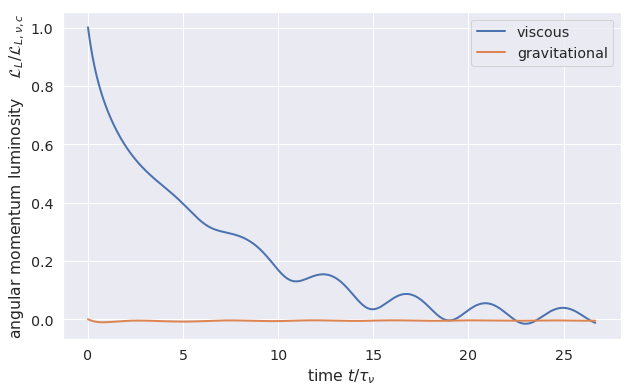

In [28]:
#plot angular momentum luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscous')
y = grav_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravitational')
p = ax.set_ylabel(r'angular momentum luminosity    ${\cal L}_{L}/{\cal L}_{L,\nu,c}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()

In [29]:
#compute viscous energy flux and luminosity
G = -1.0
c = -1.0
nu_s = shear_viscosity
nu_b = bulk_viscosity
viscous_energy_flux, viscous_energy_luminosity = calculate_energy_flux(
    total_ring_mass, number_of_streamlines, particles_per_streamline, J2, Rp, G, 
    nu_s, nu_b, c, r, t, vr, vt, wt, times, fast_gravity, confine_inner_edge, confine_outer_edge)
viscous_energy_flux_circular = viscous_flux_circular*w0
viscous_energy_luminosity_circular = viscous_luminosity_circular*w0

In [30]:
#compute gravitational energy flux and luminosity
G = G_ring
c = -1.0
nu_s = -1.0
nu_b = -1.0
grav_energy_flux, grav_energy_luminosity = calculate_energy_flux(
    total_ring_mass, number_of_streamlines, particles_per_streamline, J2, Rp, G, 
    nu_s, nu_b, c, r, t, vr, vt, wt, times, fast_gravity, confine_inner_edge, confine_outer_edge)

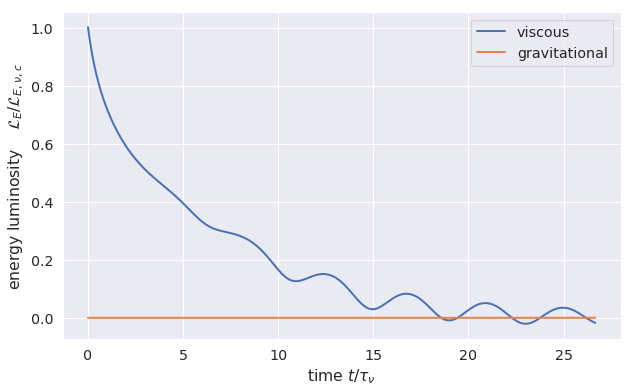

In [31]:
#plot energy luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_energy_luminosity/viscous_energy_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscous')
y = grav_energy_luminosity/viscous_energy_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravitational')
p = ax.set_ylabel(r'energy luminosity    ${\cal L}_{E}/{\cal L}_{E,\nu,c}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()

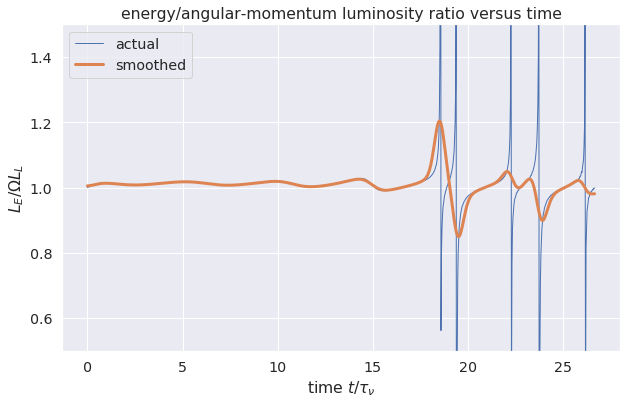

In [32]:
#plot L_E/(Omega*L_L) ratio
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
total_angular_momentum_luminosity = viscous_angular_momentum_luminosity + grav_angular_momentum_luminosity
total_energy_luminosity = viscous_energy_luminosity + grav_energy_luminosity
Omega_mean = Omega(J2, Rp, a_mean)
y = total_energy_luminosity/(Omega_mean*total_angular_momentum_luminosity)
p = ax.plot(x, y, linestyle='-', linewidth=1, label='actual')
from scipy.ndimage.filters import gaussian_filter1d
ys = gaussian_filter1d(y, sigma=10)
p = ax.plot(x, ys, linestyle='-', linewidth=3, label='smoothed')
p = ax.set_title(r'energy/angular-momentum luminosity ratio versus time')
p = ax.set_ylabel(r'$L_E/\Omega L_L$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(0.5, 1.5)
p = ax.legend()

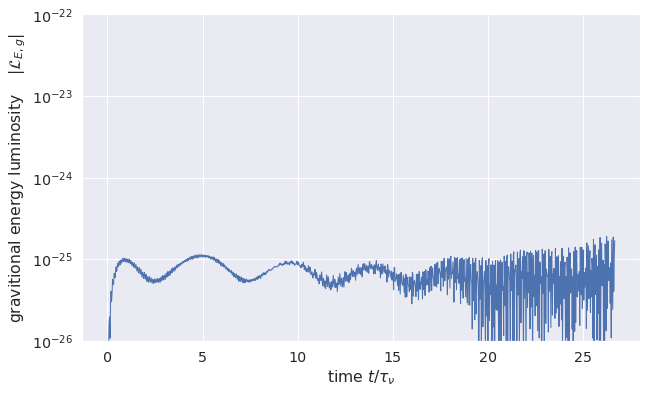

In [33]:
#plot grav_energy_luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = np.abs(grav_energy_luminosity)
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_ylabel(r'gravitional energy luminosity    $|{\cal L}_{E,g}|$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(1.0e-26, 1.0e-22)
p = ax.set_yscale('log')